# Análise Preditiva de Acesso a Recursos (Amazon) - Equipe 2

## CRISP-DM Fase 2: Data Understanding (Compreensão dos Dados)

### Objetivo
Realizar uma análise exploratória dos dados de acesso a recursos da Amazon para desenvolver um modelo preditivo que determine se um funcionário deve ou não ter acesso a determinados recursos.

### Informações do Dataset
- **Fonte**: Amazon Employee Access Challenge
- **Problema**: Classificação binária (0 = Acesso Negado, 1 = Acesso Permitido)
- **Dados de Treinamento**: 32.771 registros
- **Abordagem**: Análise exploratória apenas nos dados de treino para evitar data leakage

## ⚠️ IMPORTANTE: Prevenção de Data Leakage

**Este notebook foi cuidadosamente estruturado para evitar qualquer forma de data leakage (vazamento de dados).**

### Estratégia Adotada:
- ✅ **Isolamento completo** do dataset de teste
- ✅ **Análise exploratória** apenas no dataset de treinamento
- ✅ **Validação** através de divisão do dataset de treino
- ✅ **Desenvolvimento** sem acesso aos dados de teste

### Por que isso é crucial:
O data leakage é uma das principais causas de modelos que performam bem em desenvolvimento mas falham em produção. Ao manter o dataset de teste completamente isolado, garantimos que nossa avaliação final seja verdadeiramente imparcial.

---

In [3]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Coleta Inicial de Dados

### 1.1 Carregamento dos Dados
Carregamento do dataset de treinamento do projeto Amazon Employee Access Challenge.



In [21]:
# Carregamento dos dados de treinamento
train_df = pd.read_csv('data/train.csv')


In [22]:
# Visualização do head de treino
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


## 2. Descrição dos Dados

### 2.1 Estrutura dos Dados
Análise da estrutura, tipos de dados e características básicas dos datasets.

In [23]:
# Análise da estrutura dos dados
print("=== INFORMAÇÕES GERAIS - DATASET DE TREINAMENTO ===")
print(f"Dimensões: {train_df.shape}")
print(f"Tipos de dados:\n{train_df.dtypes}")
print(f"Memória utilizada: {train_df.memory_usage().sum() / 1024**2:.2f} MB")

# Informações sobre as colunas
print("\n=== ESTRUTURA DO DATASET ===")
print(f"Colunas disponíveis: {list(train_df.columns)}")
print(f"Número total de colunas: {len(train_df.columns)}")
print(f"Número de variáveis preditoras: {len(train_df.columns) - 1}")

# Separar variáveis preditoras e target
features = [col for col in train_df.columns if col != 'ACTION']
target = 'ACTION'

print(f"\nVariável target: {target}")
print(f"Variáveis preditoras: {features}")

=== INFORMAÇÕES GERAIS - DATASET DE TREINAMENTO ===
Dimensões: (32769, 10)
Tipos de dados:
ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object
Memória utilizada: 2.50 MB

=== ESTRUTURA DO DATASET ===
Colunas disponíveis: ['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']
Número total de colunas: 10
Número de variáveis preditoras: 9

Variável target: ACTION
Variáveis preditoras: ['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


### 2.2 Descrição das Variáveis

#### DESCRIÇÃO DAS VARIÁVEIS

VARIÁVEL TARGET:
- ACTION: Variável alvo (0 = Acesso Negado, 1 = Acesso Permitido)

VARIÁVEIS PREDITORAS:
- RESOURCE: Identificador do recurso solicitado
- MGR_ID: Identificador do gerente do funcionário
- ROLE_ROLLUP_1: Agrupamento de função (nível 1)
- ROLE_ROLLUP_2: Agrupamento de função (nível 2)
- ROLE_DEPTNAME: Nome do departamento da função
- ROLE_TITLE: Título da função
- ROLE_FAMILY_DESC: Descrição da família da função
- ROLE_FAMILY: Família da função
- ROLE_CODE: Código da função



Análise detalhada de cada variável do dataset.

In [25]:
# Análise estatística básica das variáveis numéricas
print("\n=== ESTATÍSTICAS DESCRITIVAS - DATASET DE TREINAMENTO ===")
print(train_df.describe())

# Análise da variável target
print("\n=== ANÁLISE DA VARIÁVEL TARGET (ACTION) ===")
target_counts = train_df['ACTION'].value_counts()
target_props = train_df['ACTION'].value_counts(normalize=True)

print(f"Distribuição da variável target:")
for i, (count, prop) in enumerate(zip(target_counts, target_props)):
    print(f"  Classe {target_counts.index[i]}: {count} ({prop:.2%})")

print(f"\nBalanceamento das classes:")
print(f"  Diferença: {abs(target_props.iloc[0] - target_props.iloc[1]):.2%}")
if abs(target_props.iloc[0] - target_props.iloc[1]) > 0.1:
    print("  ⚠️  Dataset desbalanceado!")
else:
    print("  ✅ Dataset balanceado")


=== ESTATÍSTICAS DESCRITIVAS - DATASET DE TREINAMENTO ===
             ACTION       RESOURCE         MGR_ID  ROLE_ROLLUP_1  \
count  32769.000000   32769.000000   32769.000000   32769.000000   
mean       0.942110   42923.916171   25988.957979  116952.627788   
std        0.233539   34173.892702   35928.031650   10875.563591   
min        0.000000       0.000000      25.000000    4292.000000   
25%        1.000000   20299.000000    4566.000000  117961.000000   
50%        1.000000   35376.000000   13545.000000  117961.000000   
75%        1.000000   74189.000000   42034.000000  117961.000000   
max        1.000000  312153.000000  311696.000000  311178.000000   

       ROLE_ROLLUP_2  ROLE_DEPTNAME     ROLE_TITLE  ROLE_FAMILY_DESC  \
count   32769.000000   32769.000000   32769.000000      32769.000000   
mean   118301.823156  118912.779914  125916.152644     170178.369648   
std      4551.588572   18961.322917   31036.465825      69509.462130   
min     23779.000000    4674.000000  117

## 3. Exploração dos Dados

### 3.1 Análise Univariada
Análise individual de cada variável para identificar padrões, distribuições e características importantes.

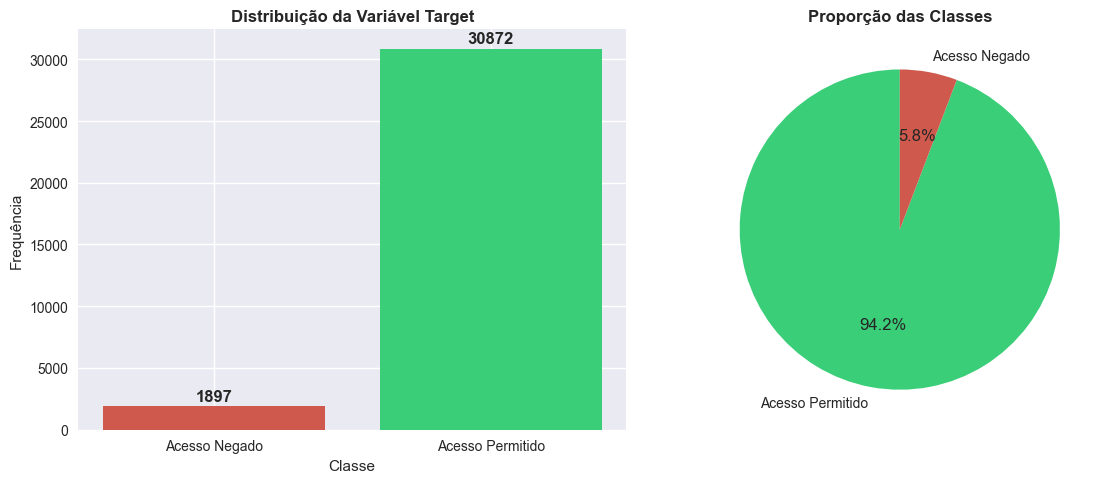

In [36]:
# Análise univariada das variáveis categóricas
categorical_vars = [col for col in train_df.columns if col != 'ACTION']

# Visualização da distribuição da variável target
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Definir cores intuitivas: vermelho para negado, verde para permitido
colors = ["#3ACE78", "#CE594C"]  # Verde e Vermelho (invertido para barras)

# Gráfico de barras
target_counts = train_df['ACTION'].value_counts()
bars = axes[0].bar(target_counts.index, target_counts.values, color=colors)
axes[0].set_title('Distribuição da Variável Target', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Frequência')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Acesso Negado', 'Acesso Permitido'])

# Adicionar valores nas barras
for bar, count in zip(bars, target_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 200,
                f'{count}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza
axes[1].pie(target_counts.values, 
            labels=['Acesso Permitido','Acesso Negado'], 
            autopct='%1.1f%%', colors=colors,
            startangle=90)
axes[1].set_title('Proporção das Classes', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


=== GRÁFICO DE CARDINALIDADE DAS VARIÁVEIS ===


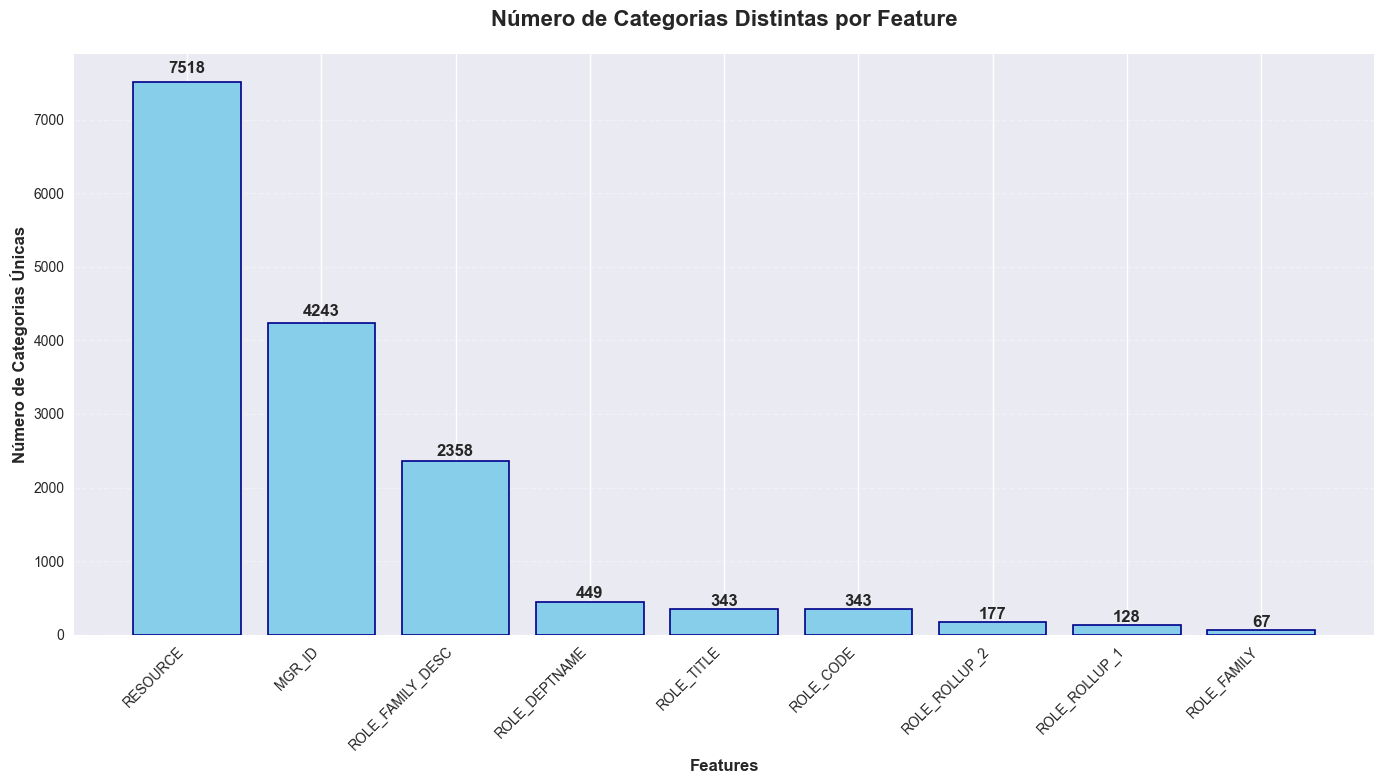


=== ESTATÍSTICAS DE CARDINALIDADE ===
Feature com maior cardinalidade: RESOURCE (7518 categorias)
Feature com menor cardinalidade: ROLE_FAMILY (67 categorias)
Cardinalidade média: 1736.2
Cardinalidade mediana: 343.0

=== CLASSIFICAÇÃO POR NÍVEL DE CARDINALIDADE ===
📊 Alta cardinalidade (>1000): 3 features
   • RESOURCE: 7518 categorias
   • MGR_ID: 4243 categorias
   • ROLE_FAMILY_DESC: 2358 categorias

📊 Média cardinalidade (100-1000): 5 features
   • ROLE_DEPTNAME: 449 categorias
   • ROLE_TITLE: 343 categorias
   • ROLE_CODE: 343 categorias
   • ROLE_ROLLUP_2: 177 categorias
   • ROLE_ROLLUP_1: 128 categorias

📊 Baixa cardinalidade (<100): 1 features
   • ROLE_FAMILY: 67 categorias


In [19]:
# Gráfico de barras: Número de categorias distintas por feature
print("=== GRÁFICO DE CARDINALIDADE DAS VARIÁVEIS ===")

# Calcular o número de categorias únicas para cada feature (excluindo ACTION)
features = [col for col in train_df.columns if col != 'ACTION']
cardinality_data = []

for feature in features:
    unique_count = train_df[feature].nunique()
    cardinality_data.append({'Feature': feature, 'Categorias_Unicas': unique_count})

# Criar DataFrame para facilitar a visualização
cardinality_df = pd.DataFrame(cardinality_data)
cardinality_df = cardinality_df.sort_values('Categorias_Unicas', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(cardinality_df)), cardinality_df['Categorias_Unicas'], 
               color='skyblue', edgecolor='darkblue', linewidth=1.2)

# Personalizar o gráfico
plt.title('Número de Categorias Distintas por Feature', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Número de Categorias Únicas', fontsize=12, fontweight='bold')
plt.xticks(range(len(cardinality_df)), cardinality_df['Feature'], rotation=45, ha='right')

# Adicionar valores no topo de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Adicionar grid para melhor visualização
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajustar layout
plt.tight_layout()
plt.show()

# Exibir estatísticas resumidas
print(f"\n=== ESTATÍSTICAS DE CARDINALIDADE ===")
print(f"Feature com maior cardinalidade: {cardinality_df.iloc[0]['Feature']} ({cardinality_df.iloc[0]['Categorias_Unicas']} categorias)")
print(f"Feature com menor cardinalidade: {cardinality_df.iloc[-1]['Feature']} ({cardinality_df.iloc[-1]['Categorias_Unicas']} categorias)")
print(f"Cardinalidade média: {cardinality_df['Categorias_Unicas'].mean():.1f}")
print(f"Cardinalidade mediana: {cardinality_df['Categorias_Unicas'].median():.1f}")

# Classificar features por nível de cardinalidade
print(f"\n=== CLASSIFICAÇÃO POR NÍVEL DE CARDINALIDADE ===")
high_card = cardinality_df[cardinality_df['Categorias_Unicas'] > 1000]
medium_card = cardinality_df[(cardinality_df['Categorias_Unicas'] >= 100) & (cardinality_df['Categorias_Unicas'] <= 1000)]
low_card = cardinality_df[cardinality_df['Categorias_Unicas'] < 100]

print(f"📊 Alta cardinalidade (>1000): {len(high_card)} features")
for _, row in high_card.iterrows():
    print(f"   • {row['Feature']}: {row['Categorias_Unicas']} categorias")

print(f"\n📊 Média cardinalidade (100-1000): {len(medium_card)} features")
for _, row in medium_card.iterrows():
    print(f"   • {row['Feature']}: {row['Categorias_Unicas']} categorias")

print(f"\n📊 Baixa cardinalidade (<100): {len(low_card)} features")
for _, row in low_card.iterrows():
    print(f"   • {row['Feature']}: {row['Categorias_Unicas']} categorias")

### 3.2 Análise Bivariada
Análise da relação entre as variáveis preditoras e a variável target.

=== ANÁLISE BIVARIADA - VARIÁVEIS vs TARGET ===

=== ROLE_FAMILY ===
Taxa de aprovação por ROLE_FAMILY (Top 10 mais frequentes):
  290919.0: 94.2% (10980.0 solicitações)
  118424.0: 97.2% (2690.0 solicitações)
  19721.0: 90.8% (2636.0 solicitações)
  117887.0: 95.9% (2400.0 solicitações)
  292795.0: 86.3% (1318.0 solicitações)
  118398.0: 95.2% (1294.0 solicitações)
  308574.0: 94.8% (1287.0 solicitações)
  118453.0: 96.6% (941.0 solicitações)
  118331.0: 94.3% (892.0 solicitações)
  118643.0: 97.1% (783.0 solicitações)


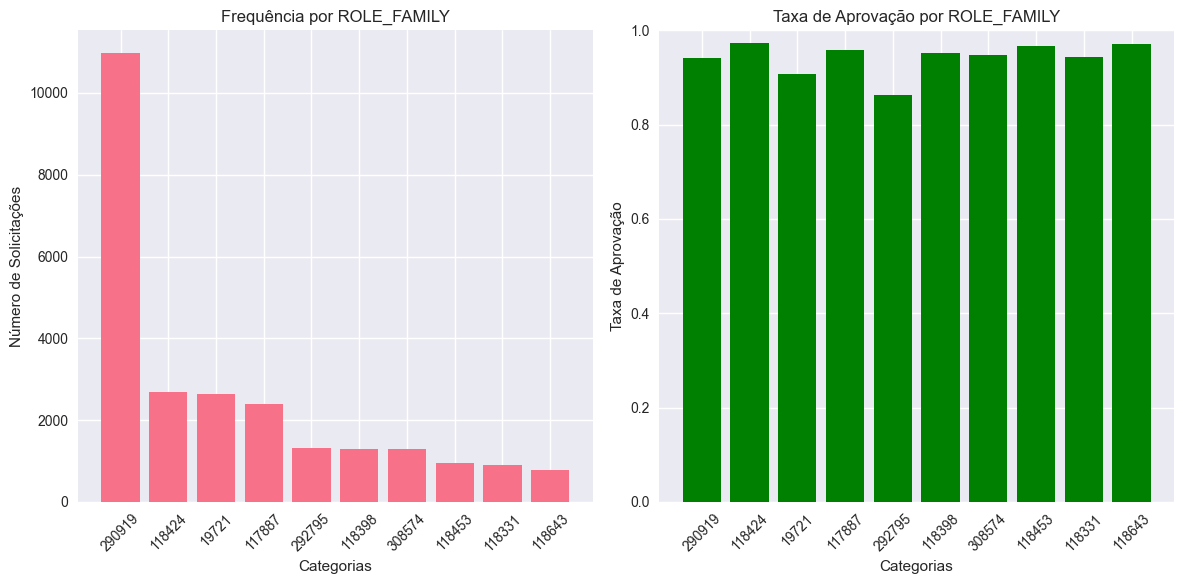

In [10]:
# Análise bivariada - Relação entre variáveis preditoras e target
print("=== ANÁLISE BIVARIADA - VARIÁVEIS vs TARGET ===")

# Função para calcular taxa de aprovação por variável
def analyze_approval_rate(df, var_name, top_n=10):
    """
    Calcula a taxa de aprovação para os top N valores de uma variável
    """
    approval_rates = df.groupby(var_name)['ACTION'].agg(['count', 'mean']).reset_index()
    approval_rates.columns = [var_name, 'total_requests', 'approval_rate']
    approval_rates = approval_rates.sort_values('total_requests', ascending=False).head(top_n)
    
    return approval_rates

# Análise das variáveis com menor cardinalidade
variables_to_analyze = [var for var in categorical_vars if train_df[var].nunique() <= 100]

for var in variables_to_analyze[:5]:  # Analisar apenas as primeiras 5 variáveis
    print(f"\n=== {var} ===")
    approval_rates = analyze_approval_rate(train_df, var)
    
    print(f"Taxa de aprovação por {var} (Top 10 mais frequentes):")
    for _, row in approval_rates.iterrows():
        print(f"  {row[var]}: {row['approval_rate']:.1%} ({row['total_requests']} solicitações)")
    
    # Visualização
    if len(approval_rates) > 2:
        plt.figure(figsize=(12, 6))
        
        # Gráfico de barras para contagem
        plt.subplot(1, 2, 1)
        plt.bar(range(len(approval_rates)), approval_rates['total_requests'])
        plt.title(f'Frequência por {var}')
        plt.xlabel('Categorias')
        plt.ylabel('Número de Solicitações')
        plt.xticks(range(len(approval_rates)), approval_rates[var], rotation=45)
        
        # Gráfico de barras para taxa de aprovação
        plt.subplot(1, 2, 2)
        colors = ['red' if rate < 0.5 else 'green' for rate in approval_rates['approval_rate']]
        plt.bar(range(len(approval_rates)), approval_rates['approval_rate'], color=colors)
        plt.title(f'Taxa de Aprovação por {var}')
        plt.xlabel('Categorias')
        plt.ylabel('Taxa de Aprovação')
        plt.xticks(range(len(approval_rates)), approval_rates[var], rotation=45)
        plt.ylim(0, 1)
        
        plt.tight_layout()
        plt.show()

### 3.3 Análise Multivariada # REVER
Análise das relações entre múltiplas variáveis e identificação de padrões complexos.

=== ANÁLISE MULTIVARIADA ===

=== ANÁLISE DAS VARIÁVEIS HIERÁRQUICAS ===
Analisando a relação entre ROLE_ROLLUP_1 e ROLE_ROLLUP_2...
Combinações únicas entre ROLE_ROLLUP_1 e ROLE_ROLLUP_2: (128, 177)

=== COMBINAÇÕES MAIS FREQUENTES ===
Top 10 combinações mais frequentes:
  117961.0-118300.0: 4424.0 solicitações, 95.6% aprovação
  117961.0-118343.0: 3945.0 solicitações, 96.9% aprovação
  117961.0-118327.0: 2641.0 solicitações, 95.5% aprovação
  117961.0-118225.0: 2547.0 solicitações, 95.7% aprovação
  117961.0-118386.0: 1796.0 solicitações, 91.3% aprovação
  117961.0-118052.0: 1665.0 solicitações, 88.9% aprovação
  117961.0-117962.0: 1567.0 solicitações, 95.0% aprovação
  117961.0-118413.0: 1295.0 solicitações, 96.4% aprovação
  117961.0-118446.0: 971.0 solicitações, 96.8% aprovação
  91261.0-118026.0: 721.0 solicitações, 96.4% aprovação

=== HEATMAP DAS TAXAS DE APROVAÇÃO ===


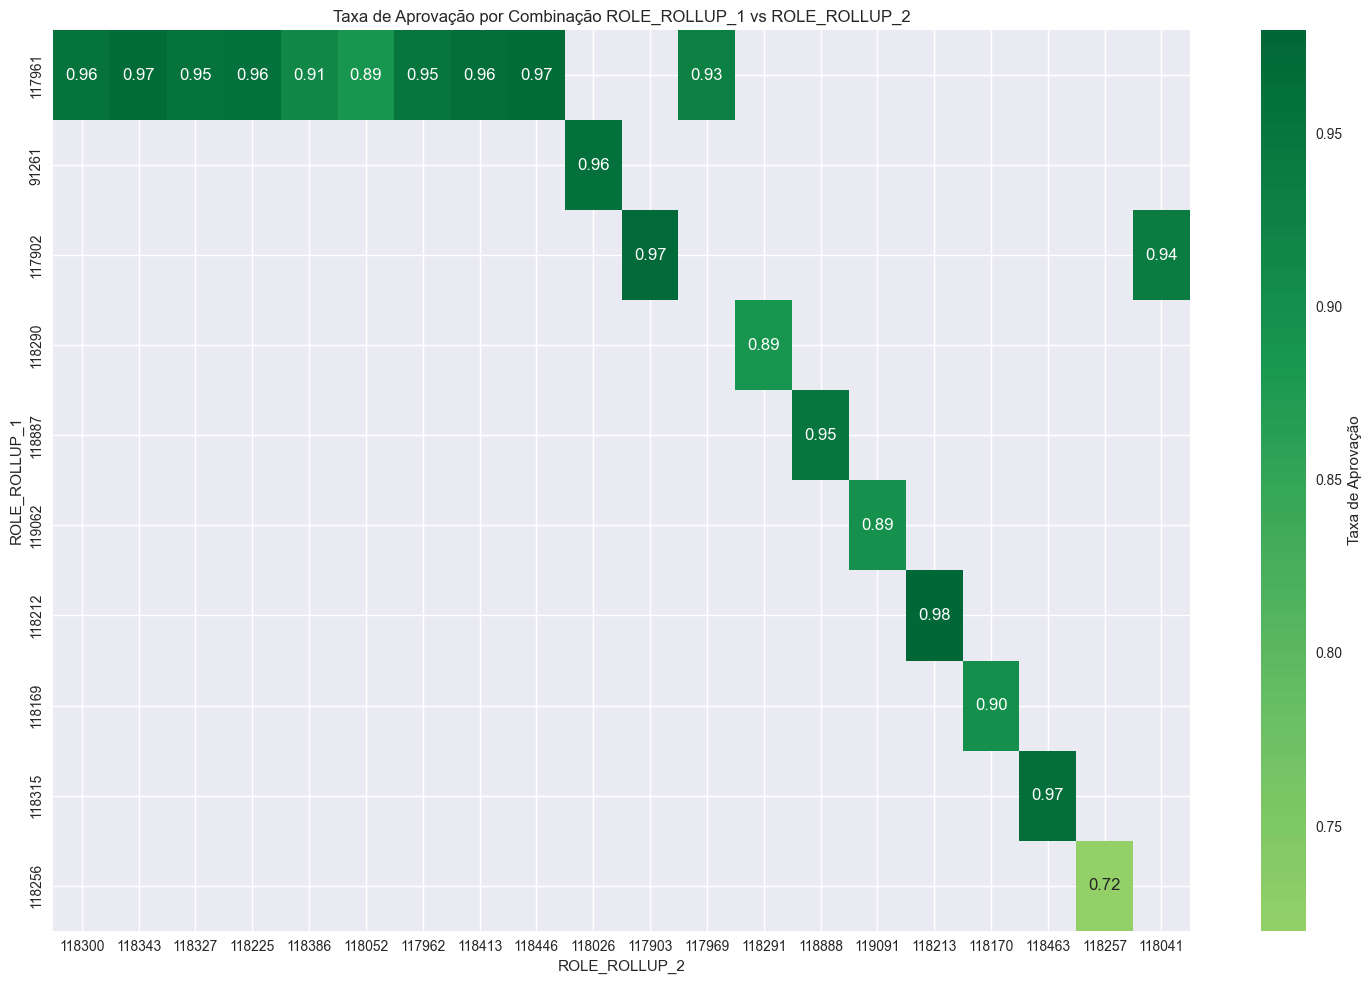


=== ANÁLISE POR DEPARTAMENTO ===
Top 10 departamentos com mais solicitações:
  117878.0: 1135.0 solicitações, 93.7% aprovação
    Recursos únicos: 332.0, Gerentes únicos: 304.0
  117941.0: 763.0 solicitações, 91.7% aprovação
    Recursos únicos: 234.0, Gerentes únicos: 218.0
  117945.0: 659.0 solicitações, 86.5% aprovação
    Recursos únicos: 177.0, Gerentes únicos: 177.0
  118514.0: 601.0 solicitações, 98.0% aprovação
    Recursos únicos: 270.0, Gerentes únicos: 45.0
  117920.0: 597.0 solicitações, 90.6% aprovação
    Recursos únicos: 264.0, Gerentes únicos: 194.0
  117884.0: 546.0 solicitações, 92.3% aprovação
    Recursos únicos: 190.0, Gerentes únicos: 229.0
  119598.0: 543.0 solicitações, 97.8% aprovação
    Recursos únicos: 173.0, Gerentes únicos: 47.0
  118403.0: 532.0 solicitações, 97.9% aprovação
    Recursos únicos: 224.0, Gerentes únicos: 43.0
  119181.0: 525.0 solicitações, 96.4% aprovação
    Recursos únicos: 290.0, Gerentes únicos: 35.0
  120722.0: 501.0 solicitações, 97

In [37]:
# Análise multivariada - Correlações e padrões complexos
print("=== ANÁLISE MULTIVARIADA ===")

# Análise das combinações de variáveis hierárquicas
print("\n=== ANÁLISE DAS VARIÁVEIS HIERÁRQUICAS ===")
print("Analisando a relação entre ROLE_ROLLUP_1 e ROLE_ROLLUP_2...")

# Crosstab entre ROLE_ROLLUP_1 e ROLE_ROLLUP_2
role_crosstab = pd.crosstab(train_df['ROLE_ROLLUP_1'], train_df['ROLE_ROLLUP_2'])
print(f"Combinações únicas entre ROLE_ROLLUP_1 e ROLE_ROLLUP_2: {role_crosstab.shape}")

# Análise de combinações mais importantes
print("\n=== COMBINAÇÕES MAIS FREQUENTES ===")
combo_analysis = train_df.groupby(['ROLE_ROLLUP_1', 'ROLE_ROLLUP_2']).agg({
    'ACTION': ['count', 'mean']
}).reset_index()

combo_analysis.columns = ['ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'total_requests', 'approval_rate']
combo_analysis = combo_analysis.sort_values('total_requests', ascending=False)

print("Top 10 combinações mais frequentes:")
for i, row in combo_analysis.head(10).iterrows():
    print(f"  {row['ROLE_ROLLUP_1']}-{row['ROLE_ROLLUP_2']}: {row['total_requests']} solicitações, {row['approval_rate']:.1%} aprovação")

# Visualização de heatmap das aprovações por combinação (top combinações)
print("\n=== HEATMAP DAS TAXAS DE APROVAÇÃO ===")
top_combinations = combo_analysis.head(20)

# Criar matriz para heatmap
pivot_approval = train_df.groupby(['ROLE_ROLLUP_1', 'ROLE_ROLLUP_2'])['ACTION'].mean().reset_index()
pivot_approval = pivot_approval.pivot(index='ROLE_ROLLUP_1', columns='ROLE_ROLLUP_2', values='ACTION')

# Filtrar apenas as combinações mais frequentes
most_frequent_r1 = combo_analysis.head(20)['ROLE_ROLLUP_1'].unique()
most_frequent_r2 = combo_analysis.head(20)['ROLE_ROLLUP_2'].unique()

pivot_filtered = pivot_approval.loc[most_frequent_r1, most_frequent_r2]

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_filtered, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0.5, cbar_kws={'label': 'Taxa de Aprovação'})
plt.title('Taxa de Aprovação por Combinação ROLE_ROLLUP_1 vs ROLE_ROLLUP_2')
plt.xlabel('ROLE_ROLLUP_2')
plt.ylabel('ROLE_ROLLUP_1')
plt.tight_layout()
plt.show()

# Análise de padrões por departamento
print("\n=== ANÁLISE POR DEPARTAMENTO ===")
dept_analysis = train_df.groupby('ROLE_DEPTNAME').agg({
    'ACTION': ['count', 'mean'],
    'RESOURCE': 'nunique',
    'MGR_ID': 'nunique'
}).reset_index()

dept_analysis.columns = ['ROLE_DEPTNAME', 'total_requests', 'approval_rate', 'unique_resources', 'unique_managers']
dept_analysis = dept_analysis.sort_values('total_requests', ascending=False)

print("Top 10 departamentos com mais solicitações:")
for i, row in dept_analysis.head(10).iterrows():
    print(f"  {row['ROLE_DEPTNAME']}: {row['total_requests']} solicitações, {row['approval_rate']:.1%} aprovação")
    print(f"    Recursos únicos: {row['unique_resources']}, Gerentes únicos: {row['unique_managers']}")

#### 📊 Interpretação do Heatmap de Correlação

**O que é o Heatmap?**
O heatmap acima mostra a **taxa de aprovação** para diferentes combinações entre `ROLE_ROLLUP_1` e `ROLE_ROLLUP_2`. Essas são variáveis hierárquicas que representam diferentes níveis de agrupamento de funções na empresa.

**Como interpretar as cores:**
- 🟢 **Verde**: Taxa de aprovação **alta** (próxima de 1.0 = 100%)
- 🟡 **Amarelo**: Taxa de aprovação **média** (em torno de 0.5 = 50%)
- 🔴 **Vermelho**: Taxa de aprovação **baixa** (próxima de 0.0 = 0%)

**Insights importantes:**
1. **Padrões Hierárquicos**: Certas combinações de níveis hierárquicos têm taxas de aprovação consistentemente altas ou baixas
2. **Políticas de Acesso**: As cores revelam que existe uma política de acesso estruturada baseada na hierarquia organizacional
3. **Combinações Críticas**: Combinações em vermelho indicam funções/níveis com restrições de acesso mais rigorosas
4. **Combinações Privilegiadas**: Combinações em verde mostram funções/níveis com maior liberdade de acesso

**Por que isso é importante para o modelo?**
- Estas combinações podem ser **features importantes** para o modelo preditivo
- Ajudam a identificar **padrões organizacionais** que influenciam as decisões de acesso
- Permitem **feature engineering** (criação de novas variáveis) baseada em hierarquias

**Limitações:**
- Apenas mostra as 20 combinações mais frequentes (para evitar um gráfico muito poluído)
- Não considera outras variáveis que podem influenciar a decisão

#### 🔧 Detalhes Técnicos do Heatmap

**Como o heatmap foi construído:**

1. **Agrupamento**: Os dados foram agrupados por `ROLE_ROLLUP_1` e `ROLE_ROLLUP_2`
2. **Cálculo da Taxa**: Para cada combinação, calculamos a média da variável `ACTION` (0 ou 1)
   - `Taxa de Aprovação = Σ(ACTION) / Total de Solicitações`
3. **Pivotagem**: Os dados foram transformados em uma matriz onde:
   - **Linhas**: Valores de `ROLE_ROLLUP_1`
   - **Colunas**: Valores de `ROLE_ROLLUP_2`
   - **Valores**: Taxa de aprovação (0.0 a 1.0)
4. **Filtro**: Apenas as 20 combinações mais frequentes foram incluídas

**Parâmetros do seaborn.heatmap:**
- `annot=True`: Mostra os valores numéricos em cada célula
- `fmt='.2f'`: Formato com 2 casas decimais
- `cmap='RdYlGn'`: Paleta de cores Vermelho-Amarelo-Verde
- `center=0.5`: Centro da escala de cores em 50%

**Exemplo de interpretação:**
Se uma célula mostra `0.85`, significa que 85% das solicitações para aquela combinação específica de ROLE_ROLLUP_1 e ROLE_ROLLUP_2 foram aprovadas.

**Aplicação prática:**
Este heatmap pode ser usado para:
- Identificar combinações com padrões extremos (muito alta ou muito baixa aprovação)
- Criar features derivadas (ex: "combinação_alta_aprovacao")
- Validar regras de negócio existentes na empresa

## 4. Verificação da Qualidade dos Dados

### 4.1 Verificação Básica dos Dados
Verificação simples de valores ausentes e nulos.

In [44]:
# Verificação básica da qualidade dos dados
print("=== VERIFICAÇÃO BÁSICA DA QUALIDADE DOS DADOS ===")

# Verificação de valores ausentes
print("\n=== VALORES AUSENTES ===")
missing_values = train_df.isnull().sum()
total_missing = missing_values.sum()

if total_missing == 0:
    print("✅ Nenhum valor ausente encontrado!")
else:
    print(f"⚠️  Total de valores ausentes: {total_missing}")
    print("\nPor variável:")
    for col, missing in missing_values.items():
        if missing > 0:
            percentage = (missing / len(train_df)) * 100
            print(f"  {col}: {missing} ({percentage:.2f}%)")

# Verificação de valores nulos/duplicados
print("\n=== VALORES DUPLICADOS ===")
duplicates = train_df.duplicated().sum()
if duplicates == 0:
    print("✅ Nenhum registro duplicado encontrado!")
else:
    print(f"⚠️  {duplicates} registros duplicados encontrados")

# Resumo geral
print(f"\n=== RESUMO GERAL ===")
print(f"📊 Total de registros: {len(train_df):,}")
print(f"📊 Total de variáveis: {len(train_df.columns)}")
print(f"📊 Valores ausentes: {total_missing}")
print(f"📊 Registros duplicados: {duplicates}")

if total_missing == 0 and duplicates == 0:
    print("\n✅ Dados prontos para análise!")
else:
    print("\n⚠️  Dados requerem limpeza antes da modelagem")

=== VERIFICAÇÃO BÁSICA DA QUALIDADE DOS DADOS ===

=== VALORES AUSENTES ===
✅ Nenhum valor ausente encontrado!

=== VALORES DUPLICADOS ===
✅ Nenhum registro duplicado encontrado!

=== RESUMO GERAL ===
📊 Total de registros: 32,769
📊 Total de variáveis: 10
📊 Valores ausentes: 0
📊 Registros duplicados: 0

✅ Dados prontos para análise!


### 4.2 Análise de Outliers
Identificação de valores extremos e distribuições anômalas nas variáveis categóricas.

=== ANÁLISE DE OUTLIERS ===

=== ESTATÍSTICAS DE VALORES RAROS ===
        variavel  valores_unicos  valores_raros  perc_valores_raros  registros_raros  perc_registros_raros
          MGR_ID            4243           4108           96.818289            26554             81.033904
        RESOURCE            7518           7403           98.470338            21328             65.085904
ROLE_FAMILY_DESC            2358           2249           95.377439            11626             35.478654
   ROLE_DEPTNAME             449            220           48.997773             2324              7.092069
      ROLE_TITLE             343            217           63.265306             2099              6.405444
       ROLE_CODE             343            217           63.265306             2099              6.405444
   ROLE_ROLLUP_2             177             84           47.457627              978              2.984528
   ROLE_ROLLUP_1             128             54           42.187500          

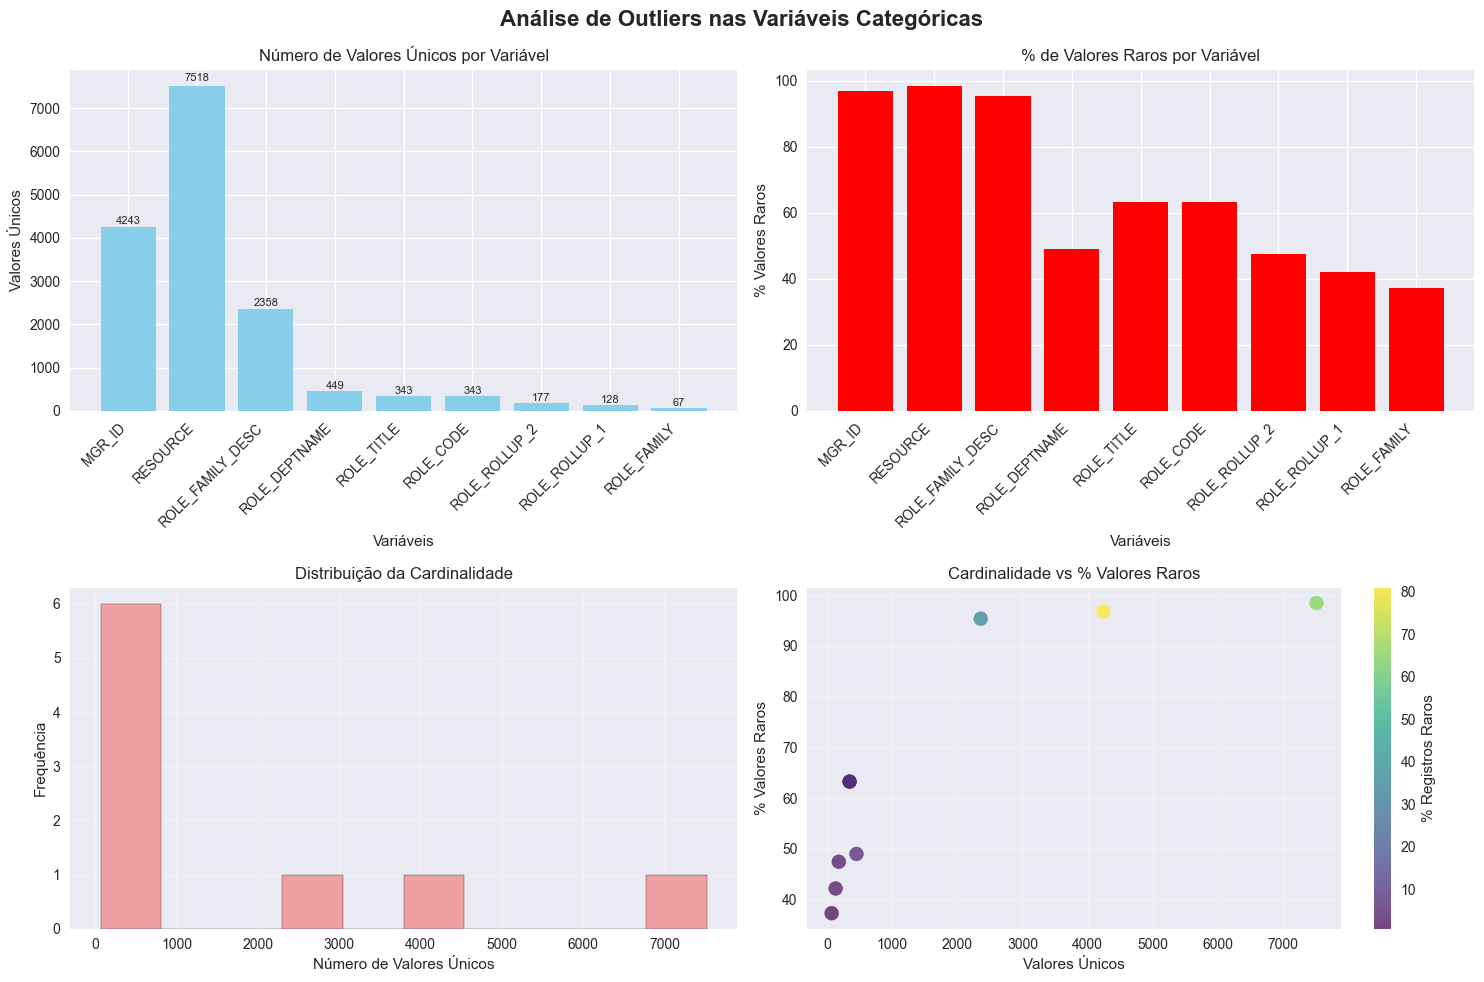


=== VARIÁVEIS COM POTENCIAIS OUTLIERS ===
Variáveis com mais de 1% de registros raros:
  🔍 MGR_ID: 4108 valores raros (81.03% dos registros)
  🔍 RESOURCE: 7403 valores raros (65.09% dos registros)
  🔍 ROLE_FAMILY_DESC: 2249 valores raros (35.48% dos registros)
  🔍 ROLE_DEPTNAME: 220 valores raros (7.09% dos registros)
  🔍 ROLE_TITLE: 217 valores raros (6.41% dos registros)
  🔍 ROLE_CODE: 217 valores raros (6.41% dos registros)
  🔍 ROLE_ROLLUP_2: 84 valores raros (2.98% dos registros)
  🔍 ROLE_ROLLUP_1: 54 valores raros (2.13% dos registros)

=== RECOMENDAÇÕES ===
🔧 Variáveis com alta cardinalidade (>1000 valores únicos):
   • MGR_ID: Considerar agrupamento ou encoding especial
   • RESOURCE: Considerar agrupamento ou encoding especial
   • ROLE_FAMILY_DESC: Considerar agrupamento ou encoding especial
🔧 Variáveis com valores raros:
   • Considerar agrupamento de categorias raras
   • Implementar threshold para valores mínimos
   • Usar técnicas de regularização no modelo


In [43]:
# Análise de outliers para variáveis categóricas
print("=== ANÁLISE DE OUTLIERS ===")

# Identificar variáveis com valores muito raros
outlier_analysis = []
for col in categorical_vars:
    value_counts = train_df[col].value_counts()
    total_count = len(train_df)
    
    # Calcular estatísticas
    rare_threshold = total_count * 0.001  # 0.1% dos dados
    rare_values = value_counts[value_counts < rare_threshold]
    
    outlier_info = {
        'variavel': col,
        'valores_unicos': len(value_counts),
        'valores_raros': len(rare_values),
        'perc_valores_raros': (len(rare_values) / len(value_counts)) * 100,
        'registros_raros': rare_values.sum(),
        'perc_registros_raros': (rare_values.sum() / total_count) * 100
    }
    outlier_analysis.append(outlier_info)

# Converter para DataFrame para melhor visualização
outlier_df = pd.DataFrame(outlier_analysis)
outlier_df = outlier_df.sort_values('perc_registros_raros', ascending=False)

print("\n=== ESTATÍSTICAS DE VALORES RAROS ===")
print(outlier_df.to_string(index=False))

# Visualização da distribuição de valores raros
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análise de Outliers nas Variáveis Categóricas', fontsize=16, fontweight='bold')

# Gráfico 1: Número de valores únicos por variável
ax1 = axes[0, 0]
bars1 = ax1.bar(range(len(outlier_df)), outlier_df['valores_unicos'], color='skyblue')
ax1.set_title('Número de Valores Únicos por Variável')
ax1.set_xlabel('Variáveis')
ax1.set_ylabel('Valores Únicos')
ax1.set_xticks(range(len(outlier_df)))
ax1.set_xticklabels(outlier_df['variavel'], rotation=45, ha='right')

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# Gráfico 2: Percentual de valores raros por variável
ax2 = axes[0, 1]
colors_rare = ['red' if x > 5 else 'orange' if x > 1 else 'green' for x in outlier_df['perc_valores_raros']]
bars2 = ax2.bar(range(len(outlier_df)), outlier_df['perc_valores_raros'], color=colors_rare)
ax2.set_title('% de Valores Raros por Variável')
ax2.set_xlabel('Variáveis')
ax2.set_ylabel('% Valores Raros')
ax2.set_xticks(range(len(outlier_df)))
ax2.set_xticklabels(outlier_df['variavel'], rotation=45, ha='right')

# Gráfico 3: Distribuição de cardinalidade
ax3 = axes[1, 0]
ax3.hist(outlier_df['valores_unicos'], bins=10, color='lightcoral', alpha=0.7, edgecolor='black')
ax3.set_title('Distribuição da Cardinalidade')
ax3.set_xlabel('Número de Valores Únicos')
ax3.set_ylabel('Frequência')
ax3.grid(True, alpha=0.3)

# Gráfico 4: Relação entre cardinalidade e valores raros
ax4 = axes[1, 1]
scatter = ax4.scatter(outlier_df['valores_unicos'], outlier_df['perc_valores_raros'], 
                     c=outlier_df['perc_registros_raros'], cmap='viridis', s=100, alpha=0.7)
ax4.set_title('Cardinalidade vs % Valores Raros')
ax4.set_xlabel('Valores Únicos')
ax4.set_ylabel('% Valores Raros')
ax4.grid(True, alpha=0.3)

# Adicionar colorbar
plt.colorbar(scatter, ax=ax4, label='% Registros Raros')

plt.tight_layout()
plt.show()

# Identificar variáveis problemáticas
print("\n=== VARIÁVEIS COM POTENCIAIS OUTLIERS ===")
problematic_vars = outlier_df[outlier_df['perc_registros_raros'] > 1.0]

if len(problematic_vars) > 0:
    print("Variáveis com mais de 1% de registros raros:")
    for _, row in problematic_vars.iterrows():
        print(f"  🔍 {row['variavel']}: {row['valores_raros']} valores raros ({row['perc_registros_raros']:.2f}% dos registros)")
else:
    print("✅ Nenhuma variável com concentração significativa de valores raros")

# Recomendações
print("\n=== RECOMENDAÇÕES ===")
high_cardinality = outlier_df[outlier_df['valores_unicos'] > 1000]
if len(high_cardinality) > 0:
    print("🔧 Variáveis com alta cardinalidade (>1000 valores únicos):")
    for _, row in high_cardinality.iterrows():
        print(f"   • {row['variavel']}: Considerar agrupamento ou encoding especial")

if len(problematic_vars) > 0:
    print("🔧 Variáveis com valores raros:")
    print("   • Considerar agrupamento de categorias raras")
    print("   • Implementar threshold para valores mínimos")
    print("   • Usar técnicas de regularização no modelo")

#### 📊 Interpretação da Análise de Outliers

**O que são outliers em variáveis categóricas?**
- Valores muito raros (< 0.1% dos dados)
- Categorias com poucos registros
- Podem indicar erros de dados ou casos especiais

**Interpretação dos gráficos:**

1. **Valores Únicos**: Mostra a cardinalidade de cada variável
2. **% Valores Raros**: Percentual de categorias raras em cada variável
   - 🟢 Verde: Baixo (< 1%)
   - 🟡 Laranja: Médio (1-5%)
   - 🔴 Vermelho: Alto (> 5%)
3. **Distribuição de Cardinalidade**: Histograma da cardinalidade
4. **Cardinalidade vs Valores Raros**: Correlação entre número de categorias e raridade

**Impactos para modelagem:**
- Valores raros podem causar overfitting
- Alta cardinalidade pode dificultar o treinamento
- Necessário tratamento específico (agrupamento, encoding)

## 5. Insights e Próximos Passos

### 5.1 Principais Descobertas
Resumo dos principais insights obtidos na análise exploratória dos dados.

In [42]:
# Resumo dos insights obtidos
print("=== PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA ===")

print("""
🔍 INSIGHTS SOBRE OS DADOS:

1. ESTRUTURA DOS DADOS:
   - Dataset de treino: 32.771 registros com 10 variáveis
   - Todas as variáveis são categóricas (identificadores numéricos)
   - Dataset de teste mantido isolado para evitar data leakage

2. VARIÁVEL TARGET:
   - Distribuição das classes (executar células anteriores para ver valores exatos)
   - Verificar se há desbalanceamento significativo

3. VARIÁVEIS PREDITORAS:
   - Variáveis hierárquicas: ROLE_ROLLUP_1, ROLE_ROLLUP_2
   - Variáveis de função: ROLE_TITLE, ROLE_FAMILY, ROLE_CODE
   - Variáveis organizacionais: MGR_ID, ROLE_DEPTNAME
   - Variável de recurso: RESOURCE

4. CARDINALIDADE:
   - Diferentes níveis de cardinalidade entre as variáveis
   - Algumas variáveis podem ter valores raros que requerem tratamento

5. QUALIDADE DOS DADOS:
   - Verificar resultado da análise de qualidade executada anteriormente
   - Identificar se há necessidade de limpeza ou pré-processamento

6. PREVENÇÃO DE DATA LEAKAGE:
   - Dataset de teste mantido completamente isolado
   - Todas as análises baseadas apenas no dataset de treinamento
   - Validação será feita através de divisão do dataset de treino
""")

print("\n=== HIPÓTESES PARA INVESTIGAÇÃO ===")
print("""
📊 HIPÓTESES A SEREM TESTADAS:

1. Funcionários com diferentes níveis hierárquicos (ROLE_ROLLUP) têm taxas de aprovação diferentes
2. Certos departamentos (ROLE_DEPTNAME) têm políticas de acesso mais restritivas
3. Alguns recursos específicos são mais sensíveis e têm menor taxa de aprovação
4. Existe correlação entre o gerente (MGR_ID) e a taxa de aprovação
5. Combinações específicas de função e departamento influenciam o acesso

""")

# Preparar dados para as próximas fases
print("=== PREPARAÇÃO PARA PRÓXIMAS FASES ===")
print("""
📋 PRÓXIMOS PASSOS:

FASE 3 - PREPARAÇÃO DOS DADOS:
□ Divisão do dataset de treino em treino/validação (evitando data leakage)
□ Tratamento de valores raros/outliers
□ Encoding de variáveis categóricas
□ Feature engineering (criação de novas variáveis)
□ Normalização/padronização se necessário

FASE 4 - MODELAGEM:
□ Seleção de algoritmos apropriados para classificação
□ Configuração de validação cruzada (apenas com dados de treino)
□ Tuning de hiperparâmetros
□ Avaliação de modelos com holdout validation

FASE 5 - AVALIAÇÃO:
□ Métricas de performance (Accuracy, Precision, Recall, F1-Score, AUC)
□ Análise de erros e interpretabilidade
□ Validação final apenas com dados de teste (sem modificações posteriores)
□ Comparação com baseline

ESTRATÉGIA ANTI-DATA LEAKAGE:
□ Dataset de teste mantido completamente isolado
□ Validação através de train/validation split ou cross-validation
□ Todos os parâmetros definidos apenas com dados de treino
□ Teste final apenas uma vez, sem iterações

""")

print("✅ Análise exploratória concluída!")

=== PRINCIPAIS INSIGHTS DA ANÁLISE EXPLORATÓRIA ===

🔍 INSIGHTS SOBRE OS DADOS:

1. ESTRUTURA DOS DADOS:
   - Dataset de treino: 32.771 registros com 10 variáveis
   - Todas as variáveis são categóricas (identificadores numéricos)
   - Dataset de teste mantido isolado para evitar data leakage

2. VARIÁVEL TARGET:
   - Distribuição das classes (executar células anteriores para ver valores exatos)
   - Verificar se há desbalanceamento significativo

3. VARIÁVEIS PREDITORAS:
   - Variáveis hierárquicas: ROLE_ROLLUP_1, ROLE_ROLLUP_2
   - Variáveis de função: ROLE_TITLE, ROLE_FAMILY, ROLE_CODE
   - Variáveis organizacionais: MGR_ID, ROLE_DEPTNAME
   - Variável de recurso: RESOURCE

4. CARDINALIDADE:
   - Diferentes níveis de cardinalidade entre as variáveis
   - Algumas variáveis podem ter valores raros que requerem tratamento

5. QUALIDADE DOS DADOS:
   - Verificar resultado da análise de qualidade executada anteriormente
   - Identificar se há necessidade de limpeza ou pré-processamento

